## 9.4. Hiyerarsik Kumeleme_Odev

1. Üç farklı linkage yöntemini kullanarak kalp hastalığı veri kümesi için dendrogramlar üretin: “mean”, “complete” ve “ward”. Sizce hangi bağlantı yöntemi daha iyi sonuç vermektedir?

In [16]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics

In [2]:
cleveland = pd.read_excel('cleveland.xlsx')
cleveland.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
168,64.0,1.0,4.0,145.0,212.0,0.0,2.0,132.0,0.0,2.0,2.0,2.0,6.0,positive
169,38.0,1.0,1.0,120.0,231.0,0.0,0.0,182.0,1.0,3.8,2.0,0.0,7.0,positive
170,61.0,1.0,4.0,138.0,166.0,0.0,2.0,125.0,1.0,3.6,2.0,1.0,3.0,positive
171,58.0,1.0,4.0,114.0,318.0,0.0,1.0,140.0,0.0,4.4,3.0,3.0,6.0,positive
172,70.0,1.0,4.0,145.0,174.0,0.0,0.0,125.0,1.0,2.6,3.0,0.0,7.0,positive


In [3]:
cleveland['num'] = cleveland.num.replace({'positive':1, 'negative':0})

In [4]:
cleveland = cleveland.dropna()

In [27]:
# cleveland.drop(cleveland.tail(1).index,inplace=True)

In [5]:
X = cleveland.drop('num', axis=1)
Y = cleveland.num

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

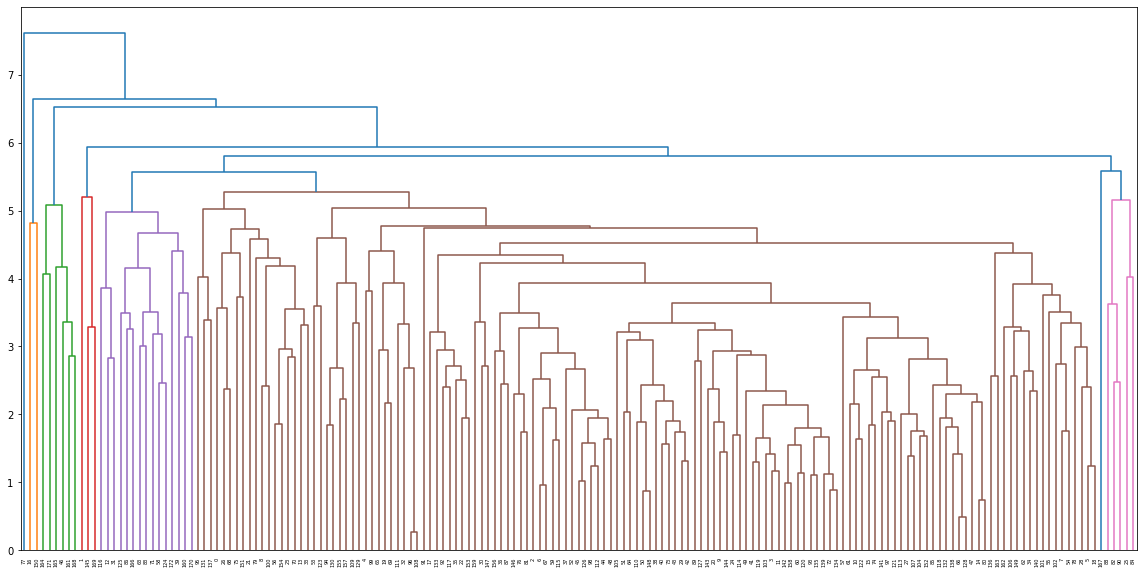

In [10]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='average'))
plt.show()

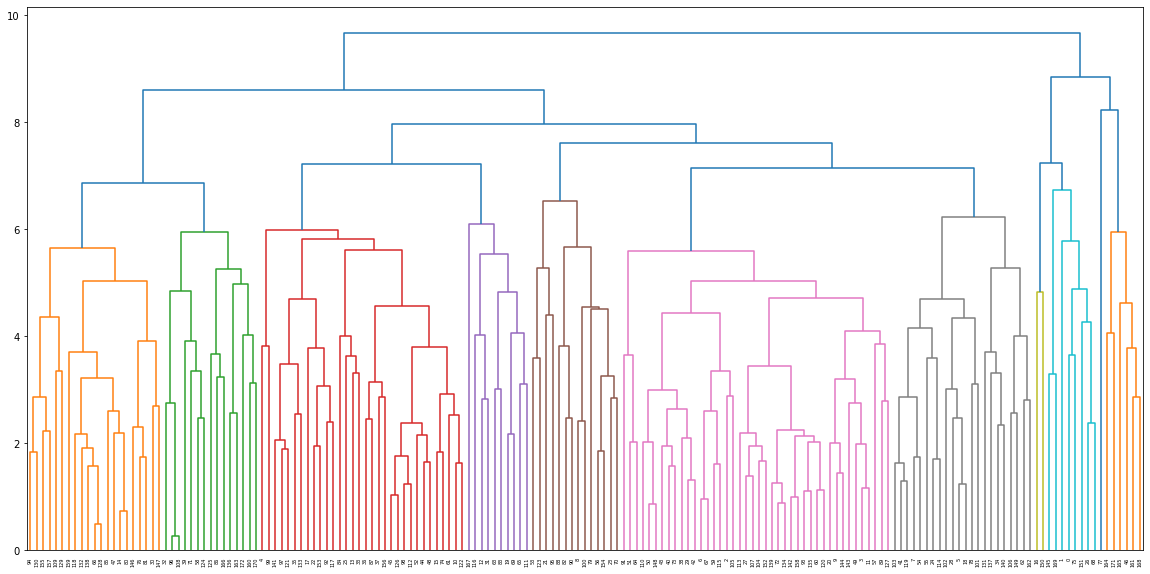

In [7]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='complete'))
plt.show()

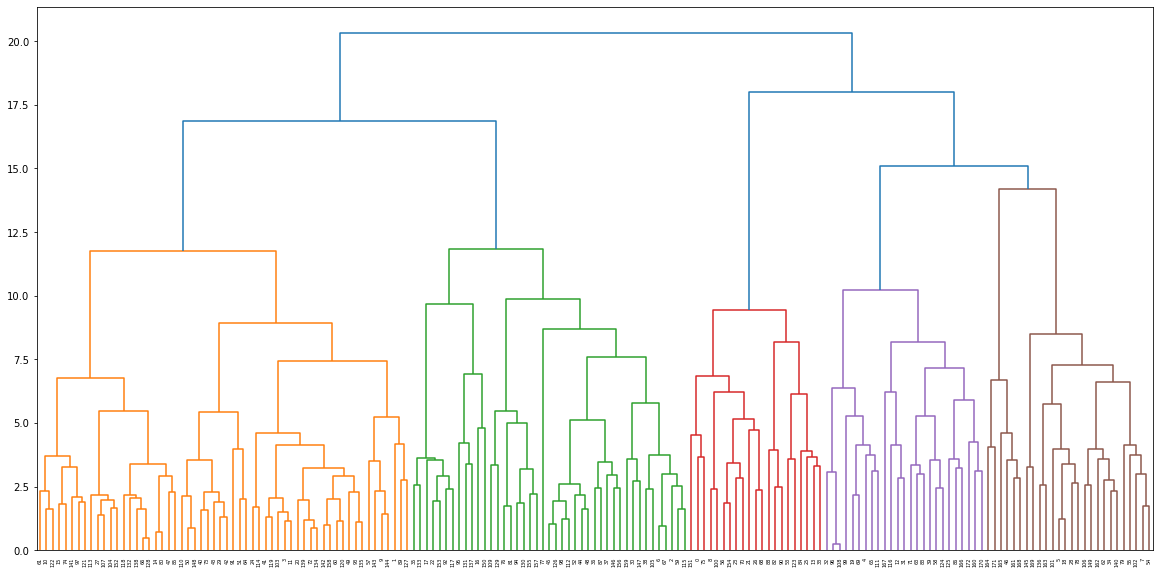

In [8]:
plt.figure(figsize=(20,10))
dendrogram(linkage(X_std, method='ward'))
plt.show()

2. n_clusters = 2 ayarını yaparak kalp hastalığı verilerine yığınsal kümeleme uygulayın. Yukarıdaki üç bağlantı yöntemini deneyin ve her bir çözümünüz için ARI ve siluet skorları elde edin. Sonuçları birbirleriyle ve önceki bölümde uyguladığınız k-ortalama çözümü ile karşılaştırın. Hangi algoritma ve ayar daha iyi performans gösterir?

In [14]:
agg_kume_a = AgglomerativeClustering(linkage = 'average', affinity = 'cosine', n_clusters = 2)

kumeler_a = agg_kume_a.fit_predict(X_std)

In [17]:
print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi (average): {}"
      .format(metrics.adjusted_rand_score(Y, kumeler_a)))
print("The silhoutte score of the Agglomerative Clustering solution (average): {}"
      .format(metrics.silhouette_score(X_std, kumeler_a, metric='euclidean')))

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi (average): 0.012544717032269151
The silhoutte score of the Agglomerative Clustering solution (average): 0.10800296692591452


In [18]:
agg_kume_c = AgglomerativeClustering(linkage = 'complete', affinity = 'cosine', n_clusters = 2)

kumeler_c = agg_kume_c.fit_predict(X_std)

In [19]:
print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi (complete): {}"
      .format(metrics.adjusted_rand_score(Y, kumeler_c)))
print("The silhoutte score of the Agglomerative Clustering solution (complete): {}"
      .format(metrics.silhouette_score(X_std, kumeler_c, metric='euclidean')))

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi (complete): 0.08593607891738035
The silhoutte score of the Agglomerative Clustering solution (complete): 0.11685651178322344


In [22]:
agg_kume_w = AgglomerativeClustering(linkage = 'ward', affinity = 'euclidean', n_clusters = 2)

kumeler_w = agg_kume_w.fit_predict(X_std)

In [23]:
print("Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi (ward): {}"
      .format(metrics.adjusted_rand_score(Y, kumeler_w)))
print("The silhoutte score of the Agglomerative Clustering solution (ward): {}"
      .format(metrics.silhouette_score(X_std, kumeler_w, metric='euclidean')))

Yığınsal Kümeleme Sonuçlarının Ayarlanmış Rand Endeksi (ward): 0.08098363067008882
The silhoutte score of the Agglomerative Clustering solution (ward): 0.12386494549442698
